In [The Mean as Predictor](mean_meaning), we found that the mean had some good
properties as a single best predictor for a whole distribution.

* The mean gives a total prediction error of zero.  Put otherwise, on average,
  your prediction error is zero.
* The mean gives the lowest squared error.  Put otherwise, the mean gives the
  lowest average squared difference from the observed value.

Now we can consider what predictor we should use when predicting one set of values, from a different set of values.

We load our usual libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Make plots look a little bit more fancy
plt.style.use('fivethirtyeight')
# Print to 4 decimal places, show tiny values as 0
np.set_printoptions(precision=4, suppress=True)
import pandas as pd

We start with some [data on chronic kidney
disease]({{ site.baseurl }}/data/chronic_kidney_disease).

Download the data to your computer via this link: [ckd_clean.csv]({{
site.baseurl }}/data/ckd_clean.csv).

This is a data table with one row per patient and one column per test on that
patient.  Many of columns are values from blood tests.  Most of the patients
have chronic kidney disease.

To make things a bit easier this dataset is a version from which we have already dropped all missing values.  See the dataset page linked above for more detail.

In [2]:
# Run this cell
ckd = pd.read_csv('ckd_clean.csv')
ckd.head()

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,Blood Glucose Random,...,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
0,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,1
1,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,...,29.0,12100.0,3.7,yes,yes,no,poor,no,yes,1
2,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,380.0,...,32.0,4500.0,3.8,yes,yes,no,poor,yes,no,1
3,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,157.0,...,16.0,11000.0,2.6,yes,yes,yes,poor,yes,no,1
4,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,173.0,...,24.0,9200.0,3.2,yes,yes,yes,poor,yes,yes,1


We are interested in two columns from this data frame, "Packed Cell Volume" and "Hemoglobin".

[Packed Cell Volume](https://en.wikipedia.org/wiki/Hematocrit) (PCV) is a
measurement of the percentage of blood volume taken up by red blood cells.  It
is a measurement of anemia, and anemia is a common consequence of chronic
kidney disease.

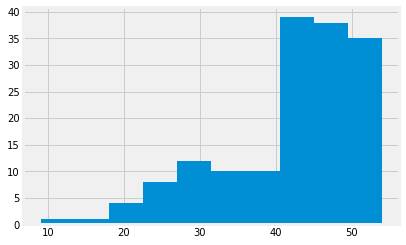

In [3]:
# Get the packed cell volume values as a Series.
pcv_series = ckd['Packed Cell Volume']
# Show the distribution.
pcv_series.hist()

"Hemoglobin" (HGB) is the concentration of the
[hemoglobin](https://en.wikipedia.org/wiki/Hemoglobin) molecule in blood, in
grams per deciliter.  Hemoglobin is the iron-containing protein in red blood
cells that carries oxygen to the tissues.

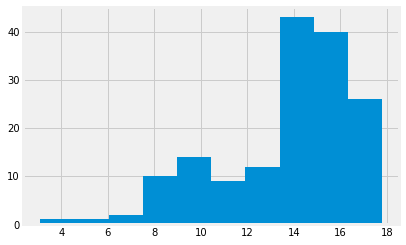

In [4]:
# Get the hemoglobin concentration values as a Series.
hgb_series = ckd['Hemoglobin']
# Show the distribution.
hgb_series.hist()

We convert these Series into arrays, to make them simpler to work with.  We do
this with the Numpy `array` function, that makes arrays from many other types
of object.

In [5]:
pcv = np.array(pcv_series)
hgb = np.array(hgb_series)

## Looking for straight lines

The [Wikipedia page for PCV](https://en.wikipedia.org/wiki/Hematocrit) says (at
the time of writing):

> An estimated hematocrit as a percentage may be derived by tripling the
> hemoglobin concentration in g/dL and dropping the units.
> [source](https://www.doctorslounge.com/hematology/labs/hematocrit.htm).

This rule-of-thumb suggests that the values for PCV will be roughly three times
the values for HGB.

Therefore, if we plot the HGB values on the x-axis of a plot, and the PCV
values on the y-axis, we should see something that is roughly compatible with a
straight line going through 0, 0, and with a slope of about 3.

Here is the plot.  This time, for fun, we add a label to the X and Y axes with
`xlabel` and `ylabel`.

Text(0, 0.5, 'Packed cell volume')

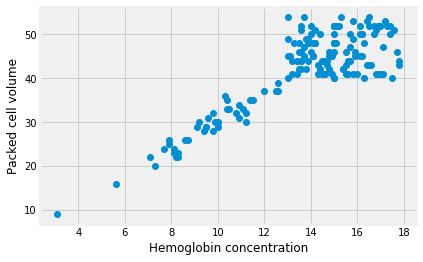

In [6]:
# Plot HGB on the x axis, PCV on the y axis
plt.plot(hgb, pcv, 'o')
plt.xlabel('Hemoglobin concentration')
plt.ylabel('Packed cell volume')

The `'o'` argument to the plot function above is a "plot marker".  It tells
Matplotlib to plot the points as points, rather than joining them with lines.
The markers for the points will be filled circles, with `'o'`, but we can also
ask for other symbols such as plus marks (with `'+'`) and crosses (with `'x'`).

The line does look a bit like it has a slope of about 3.  But - is that true?
Is the *best* slope 3?  What slope would we find, if we looked for the *best*
slope?  What could *best* mean, for *best slope*?

## Adjusting axes

We would like to see what this graph looks like in relation to the origin -
x=0, y=0.  In order to this, we can add a `plt.axis` function call, like this:

[0, 18, 0, 55]

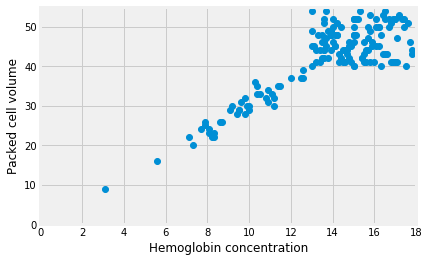

In [7]:
# Plot HGB on the x axis, PCV on the y axis
plt.plot(hgb, pcv, 'o')
plt.xlabel('Hemoglobin concentration')
plt.ylabel('Packed cell volume')
# Set the x axis to go from 0 to 18, y axis from 0 to 55.
plt.axis([0, 18, 0, 55])

It does look plausible that this line goes through the origin, and that makes
sense.  All hemoglobin is in red blood cells; we might expect the volume of red
blood cells to be zero when the hemoglobin concentration is zero.

## Putting points on plots

Before we go on, we will need some machinery to plot arbitrary points on plots.

In fact this works in exactly the same way as the points you have already seen
on plots.  We use the `plot` function, with a suitable plot marker.  The x
coordinates of the points go in the first argument, and the y coordinates go in
the second.

To plot a single point, pass a single x and y coordinate value:

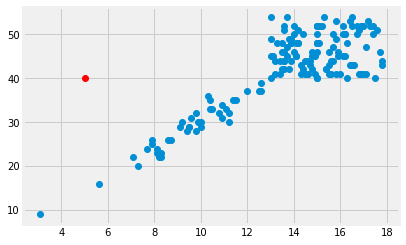

In [8]:
plt.plot(hgb, pcv, 'o')
# A red point at x=5, y=40
plt.plot(5, 40, 'o', color='red')

To plot more than one point, pass multiple x and y coordinate values:

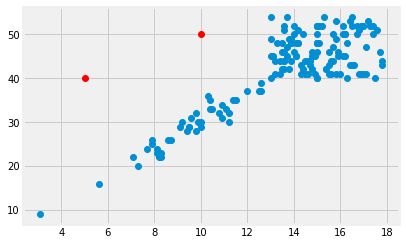

In [9]:
plt.plot(hgb, pcv, 'o')
# Two red points, one at [5, 40], the other at [10, 50]
plt.plot([5, 10], [40, 50], 'o', color='red')

## The mean as applied to plots

We want a straight line that fits these points.

The straight line should do the best job it can in *predicting* the PCV values from the HGB values.

We found that the mean was a good predictor for a distribution of values.  We
could try and find a line or something similar that went through the mean of
the PCV values, at any given HGB value.

Let's split the HGB values up into bins centered on 7.5, 8.5, and so on.  Then
we take the mean of all the PCV values corresponding to HGB values between 7
and 8, 8 and 9, and so on.

In [10]:
# The centers for our HGB bins
hgb_bin_centers = np.arange(7.5, 17.5)
hgb_bin_centers

array([ 7.5,  8.5,  9.5, 10.5, 11.5, 12.5, 13.5, 14.5, 15.5, 16.5])

In [11]:
# The number of bins
n_bins = len(hgb_bin_centers)
n_bins

10

Show the center of the bins on the x axis of the plot.

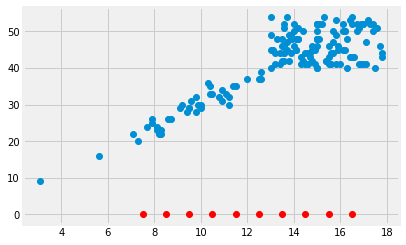

In [12]:
plt.plot(hgb, pcv, 'o')
plt.plot(hgb_bin_centers, np.zeros(n_bins), 'o', color='red')

Take the mean of the PCV values for each bin.

In [13]:
pcv_means = np.zeros(n_bins)
for i in np.arange(n_bins):
    mid = hgb_bin_centers[i]
    # Boolean identifing indices withing the HGB bin
    fr_within_bin = (hgb >= mid - 0.5) & (hgb < mid + 0.5)
    # Take the mean of the corresponding PCV values
    pcv_means[i] = np.mean(pcv[fr_within_bin])
pcv_means

array([23.4   , 23.7143, 29.5556, 32.5556, 33.    , 37.5   , 46.2069,
       45.2083, 46.7586, 47.4286])

These means should be good predictors for PCV values, given an HGB value.  We
check the bin of the HGB value and take the corresponding PCV mean as the
prediction.

Here is a plot of the means of PCV for every bin:

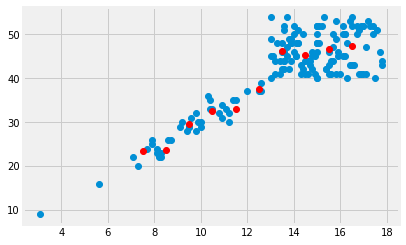

In [14]:
plt.plot(hgb, pcv, 'o')
plt.plot(hgb_bin_centers, pcv_means, 'o', color='red')

## Finding a predicting line

The means per bin give some prediction of the PCV values from the HGB.  Can we
do better?  Can we find a line that predicts the PCV data from the HGB data?

Remember, any line can be fully described by an *intercept* $c$ and a *slope*
$s$.  A line predicts the $y$ values from the $x$ values, using the slope $s$
and the intercept $c$:

$$
y = c + x * s
$$

The *intercept* is the value of the line when x is equal to 0.  It is therefore
where the line crosses the y axis.

In our case, let us assume the intercept is 0.  We will assume PCV of 0 if
there is no hemoglobin.

Now we want to find a good *slope*.  The *slope* is the amount that the y
values increase for a one unit increase in the x values.  In our case, it is
the increase in the PCV for a 1 gram / deciliter increase in the HGB.

Let's guess the slope is 3, as Wikipedia told us it should be:

In [15]:
slope = 3

Remember our line prediction for y (PCV) is:

$$
y = c + x * s
$$

where x is the HGB.  In our case we assume the intercept is 0, so:

In [16]:
pcv_predicted = hgb * slope

Plot the predictions in red on the original data in blue.

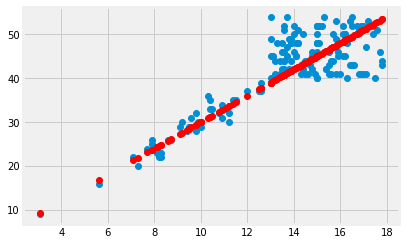

In [17]:
plt.plot(hgb, pcv, 'o')
plt.plot(hgb, pcv_predicted, 'o', color='red')

The red are the predictions, the blue are the original data.  At each PCV value
we have a prediction, and therefore, an error in our prediction; the difference
between the predicted value and the actual values.

In [18]:
error = pcv - pcv_predicted
error[:10]

array([-1.6,  0.5, -0.4, -0.8,  0.9,  2.6, -0.5, -1. ,  1.5, -1.4])

In this plot, for each point, we draw a thin dotted line between the prediction
of PCV for each point, and its actual value.

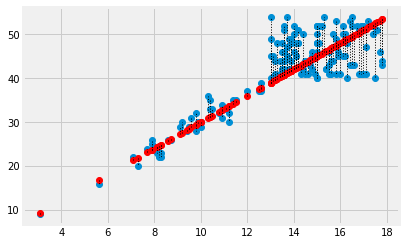

In [19]:
plt.plot(hgb, pcv, 'o')
plt.plot(hgb, pcv_predicted, 'o', color='red')
# Draw a line between predicted and actual
for i in np.arange(len(hgb)):
    x = hgb[i]
    y_0 = pcv_predicted[i]
    y_1 = pcv[i]
    plt.plot([x, x], [y_0, y_1], ':', color='black', linewidth=1)

## What is a good line?

We have guessed a slope, and so defined a line. We calculated the errors from
our guessed line.

How would we decide whether our slope was a good one?  Put otherwise, how would
we decide when we have a good line?

A good line should have small prediction errors. That is, the line should give
a good prediction of the points.  That is, the line should result in small
*errors*.

We would like a slope that gives us the smallest error.

## One metric for the line

[The Mean as Predictor](mean_meaning) section showed that the mean is the value
with the smallest squared distance from the other values in the distribution.
The mean is the predictor value that minimizes the sum of squared distances
from the other values.

We can use the same metric for our line.  Instead of using a single vector as a
predictor, now we are using the values on the line as predictors.  We want the
HGB slope, in our case, that gives the best predictors of the PCV values.
Specifically, we want the slope that gives the smallest sum of squares
difference between the line prediction and the actual values.

We have already calculated the prediction and error for our slope of 3, but
let's do it again, and then calculate the *sum of squares* of the error:

In [20]:
slope = 3
pcv_predicted = hgb * slope
error = pcv - pcv_predicted
# The sum of squared error
np.sum(error ** 2)

3689.340000000001

We are about to do this calculation many times, for many different slopes.  We
need a *function*.

In the function below, we are using [function world](../07/functions)
to get the values of `hgb` and `pcv` defined here at the top level,
outside *function world*. The function can see these values, from
function world.

In [21]:
def sos_error(slope):
    predicted = hgb * slope  # 'hgb' comes from the top level
    error = pcv - predicted  # 'pcv' comes from the top level
    return np.sum(error ** 2)

First check we get the same answer as the calculation above:

In [22]:
sos_error(3)

3689.340000000001

Does 3.5 give a higher or lower sum of squared error?

In [23]:
sos_error(3.5)

9947.535

Now we can use the same strategy as we used in the [mean meaning](mean_meaning)
page, to try lots of slopes, and find the one that gives the smallest sum of
squared error.

In [24]:
# Slopes to try
some_slopes = np.arange(2, 4, 0.01)
n_slopes = len(some_slopes)
# Try all these slopes, calculate and record sum of squared error
sos_errors = np.zeros(n_slopes)
for i in np.arange(n_slopes):
    slope = some_slopes[i]
    sos_errors[i] = sos_error(slope)
# Show the first 10 values
sos_errors[:10]

array([37529.64  , 36885.2828, 36247.1066, 35615.1112, 34989.2967,
       34369.6632, 33756.2105, 33148.9387, 32547.8477, 31952.9377])

We plot the slopes we have tried, on the x axis, against the sum of squared
error, on the y-axis.


Text(0, 0.5, 'Sum of squared error')

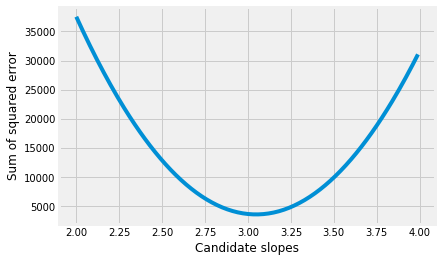

In [25]:
plt.plot(some_slopes, sos_errors)
plt.xlabel('Candidate slopes')
plt.ylabel('Sum of squared error')

The minimum of the sum of squared error is:

In [26]:
np.min(sos_errors)

3619.8091499999964

We want to find the slope that corresponds to this minimum.  We can use
[argmin](where_and_argmin).

In [27]:
# Index of minumum value
i_of_min = np.argmin(sos_errors)
i_of_min

105

This is the index position of the minimum.  We will therefore get the minimum
(again) if we index into the original array with the index we just found:

In [28]:
# Check we do in fact get the minimum at this index
sos_errors[i_of_min]

3619.8091499999964

Now we can get and show the slope value that corresponds the minimum sum of
squared error:

In [29]:
best_slope = some_slopes[i_of_min]
best_slope

3.0499999999999776

Plot the data, predictions and errors for the line that minimizes the sum of
squared error:

Text(0.5, 1.0, 'The best-fit line using least-squared error')

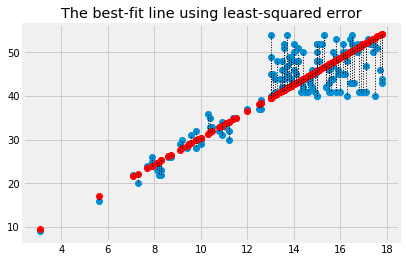

In [30]:
best_predicted = hgb * best_slope
plt.plot(hgb, pcv, 'o')
plt.plot(hgb, best_predicted, 'o', color='red')
for i in np.arange(len(hgb)):
    x = hgb[i]
    y_0 = best_predicted[i]
    y_1 = pcv[i]
    plt.plot([x, x], [y_0, y_1], ':', color='black', linewidth=1)
plt.title('The best-fit line using least-squared error')

The algorithm we have used so far, is rather slow and clunky, because we had to
make an array with lots of slopes to try, and then go through each one to find
the slope that minimizes the squared error.

In fact, we will soon see, we can use some tricks to get Python to do all this
work for us, much more quickly.

Finding techniques for doing this automatically is a whole mathematical field,
called [optimization](https://en.wikipedia.org/wiki/Mathematical_optimization).

For now, let's leap to using these techniques on our problem, of finding the
best slope:

In [31]:
from scipy.optimize import minimize
# 3 below is the slope value to start the search.
res = minimize(sos_error, 3)
res

      fun: 3619.6157878183294
 hess_inv: array([[0.]])
      jac: array([0.])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 16
      nit: 2
     njev: 5
   status: 2
  success: False
        x: array([3.0475])

The slope is in the `x` attribute of the return value:

In [32]:
res.x

array([3.0475])

## The magic of maths

We found the best (sum of squares) slope by trying lots of slopes, above, and then, rather more efficiently, by using `minimize` to do that job for us.

You don't need to understand the argument below, to follow this class, but in
this case we can work out the best slope with some [fairly simple calculus and
algebra](../extra/slope_deviations).  It turns out like this:

In [33]:
maths_slope = np.sum(hgb * pcv) / np.sum(hgb ** 2)
maths_slope

3.047498645826524

See the page linked above for why this formula works for any set of x and y
values, where the intercept is zero.

But - we won't be using these mathematical short cuts in this course, we will
be using `minimize` and friends to find the best slope by trial and error.